# Predicting Ads Click-Through Rate (CTR)

## Introduction

- Click-Through Rate (CTR) prediction is a fundamental task in online advertising. The main objective is to estimate the probability that a user will click on a given advertisement. Accurate CTR prediction is essential for optimizing ad campaigns, allowing advertisers to allocate resources efficiently, target specific audience segments, and maximize return on investment (ROI). Machine learning techniques are often employed for this task due to their ability to process large datasets and identify intricate patterns that help forecast user behavior.

## Installing and Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from faker import Faker
import matplotlib.pyplot as plt
import joblib
import sys
import os

In [5]:
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/CTR_Project'
    DATA_DIR = DIR + '/Data/'
    os.chdir(DIR)
else:
    DATA_DIR = 'data/'

## Loading and Exploring the Dataset

In [6]:
# Load the dataset
data = pd.read_csv(DATA_DIR + 'ad_records.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


## Datetime Conversion

In [7]:
# Convert 'Timestamp' column to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract hour, day, and month from timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month

## Encoding Categorical Features

In [8]:
# Store unique cities and countries before encoding
unique_cities = data['City'].unique()
unique_countries = data['Country'].unique()

# Initialize label encoders for categorical variables
label_encoders = {}

# Encode categorical variables
for col in ['City', 'Gender', 'Country']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,234,1,174,2016-06-09 21:43:05,0,21,9,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,460,1,166,2016-01-16 17:56:05,0,17,16,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,379,0,71,2016-06-29 10:50:45,0,10,29,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,269,0,205,2016-06-21 14:32:32,0,14,21,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,495,0,149,2016-07-21 10:54:35,1,10,21,7


# Feature Selection and Target Variable Definition

In [9]:
# Concatenate numerical and timestamp features
X = data.drop(['Clicked on Ad', 'Ad Topic Line', 'Timestamp'], axis=1)
y = data['Clicked on Ad']

# Splitting the Dataset into Training and Testing Sets

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost Classifier

In [11]:
# Train an XGBClassifier
clf_xgb = xgb.XGBClassifier(n_estimators=200, random_state=42)  # Use XGBClassifier
clf_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Model Evaluation and Accuracy Calculation

In [12]:
# Evaluate the model
y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.884


# Generating the Classification Report

In [13]:
# Compute classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Print classification report in DataFrame
print("\nClassification Report:")
print(class_report_df)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support
0              0.887897  0.882643  0.885262  1014.000
1              0.880040  0.885396  0.882710   986.000
accuracy       0.884000  0.884000  0.884000     0.884
macro avg      0.883969  0.884019  0.883986  2000.000
weighted avg   0.884024  0.884000  0.884004  2000.000

Confusion Matrix:
[[895 119]
 [113 873]]


## Feature Importance

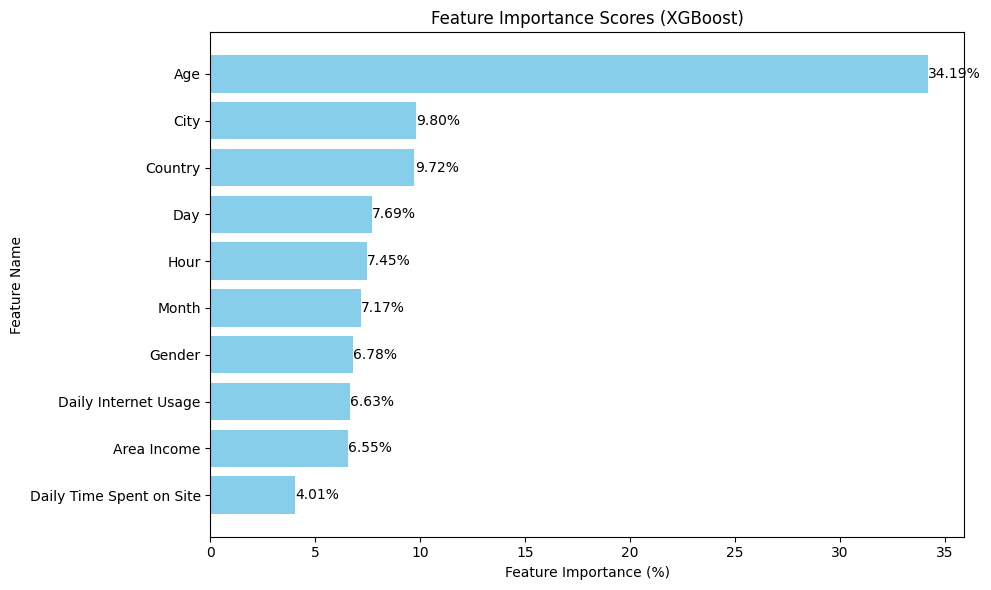

In [14]:
# Get and sort feature importances
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns
total_importance = sum(feature_importances)  # Calculate total importance

# Calculate percentage importances
percentage_importances = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Create feature importance visualization with percentages
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Add percentage labels on top of bars
for i, v in enumerate(feature_importance_df['importance']):
    plt.text(v + 0.02, i, f"{v:.2f}%", va='center')  # Adjust offset for better positioning

plt.tight_layout()
plt.show()

## Generating Synthetic Data for Model Testing

In [15]:
# Generate synthetic 'City' and 'Country' values using unique values from the original dataset
fake = Faker()
n_samples = 1000  # Number of synthetic samples
synthetic_data = pd.DataFrame({
    'Daily Time Spent on Site': np.random.uniform(20, 120, n_samples),
    'Age': np.random.randint(18, 65, n_samples),
    'Area Income': np.random.uniform(15000, 100000, n_samples),
    'Daily Internet Usage': np.random.uniform(50, 300, n_samples),
    'City': [fake.random_element(unique_cities) for _ in range(n_samples)],
    'Gender': [fake.random_element(['Male', 'Female']) for _ in range(n_samples)],
    'Country': [fake.random_element(unique_countries) for _ in range(n_samples)],
    'Timestamp': [fake.date_time_this_year() for _ in range(n_samples)]
})

## Preprocessing and Encoding Synthetic Data

In [16]:
# Convert 'Timestamp' column to datetime type
synthetic_data['Timestamp'] = pd.to_datetime(synthetic_data['Timestamp'])

# Extract hour, day, and month from timestamp for synthetic data
synthetic_data['Hour'] = synthetic_data['Timestamp'].dt.hour
synthetic_data['Day'] = synthetic_data['Timestamp'].dt.day
synthetic_data['Month'] = synthetic_data['Timestamp'].dt.month

# Encode categorical variables for synthetic data using the same label encoders
for col in ['Gender']:
    synthetic_data[col] = label_encoders[col].transform(synthetic_data[col])

# Filter out any synthetic values not present in the original dataset for 'City' and 'Country'
synthetic_data = synthetic_data[synthetic_data['City'].isin(unique_cities)]
synthetic_data = synthetic_data[synthetic_data['Country'].isin(unique_countries)]

# Encode 'City' and 'Country' using label encoders
synthetic_data['City'] = label_encoders['City'].transform(synthetic_data['City'])
synthetic_data['Country'] = label_encoders['Country'].transform(synthetic_data['Country'])

# Drop Timestamp feature for synthetic data
synthetic_X = synthetic_data.drop(['Timestamp'], axis=1)

In [17]:
synthetic_X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Hour,Day,Month
0,30.937778,36,52220.614685,233.794213,243,0,124,21,7,9
1,106.219434,37,45234.616677,136.147176,438,0,112,15,28,8
2,76.270810,52,49277.495854,216.858775,387,0,87,13,28,2
3,66.394658,26,88621.430054,68.096119,293,1,183,15,4,8
4,55.150795,41,51292.014408,203.216707,153,1,135,8,4,2


## Evaluate Model Performance with Synthetic Data

In [18]:
highest_accuracy = 0.0
best_seed = None

for seed in range(1000):  # Adjust the range for more or fewer seeds
    np.random.seed(seed)  # Set the random seed

    # Generate synthetic labels for each seed
    synthetic_data['Clicked on Ad'] = np.random.randint(0, 2, len(synthetic_data))

    # Make predictions for the current synthetic labels
    synthetic_predictions = clf_xgb.predict(synthetic_X)

    # Calculate accuracy for the current seed
    accuracy_synthetic = accuracy_score(synthetic_data['Clicked on Ad'], synthetic_predictions)

    # Update highest accuracy and best seed if necessary
    if accuracy_synthetic > highest_accuracy:
        highest_accuracy = accuracy_synthetic
        best_seed = seed

# Evaluate the accuracy of the model on the synthetic data
print(f"Accuracy on Synthetic Data: {highest_accuracy:.4f}")

Accuracy on Synthetic Data: 0.5530


## Decoding and Displaying Synthetic Data

In [19]:
# Decode city, gender, and country names
synthetic_data['City'] = label_encoders['City'].inverse_transform(synthetic_data['City'])
synthetic_data['Gender'] = label_encoders['Gender'].inverse_transform(synthetic_data['Gender'])
synthetic_data['Country'] = label_encoders['Country'].inverse_transform(synthetic_data['Country'])

# Print synthetic dataset along with predictions
synthetic_data['Predictions'] = synthetic_predictions
synthetic_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Timestamp,Hour,Day,Month,Clicked on Ad,Predictions
0,30.937778,36,52220.614685,233.794213,Melissastad,Female,Mozambique,2025-09-07 21:27:36,21,7,9,0,0
1,106.219434,37,45234.616677,136.147176,Tammyshire,Female,Malta,2025-08-28 15:17:48,15,28,8,0,1
2,76.270810,52,49277.495854,216.858775,Robertstown,Female,Isle of Man,2025-02-28 13:19:59,13,28,2,1,1
3,66.394658,26,88621.430054,68.096119,North April,Male,Togo,2025-08-04 15:59:10,15,4,8,1,1
4,55.150795,41,51292.014408,203.216707,Jeffreymouth,Male,Norfolk Island,2025-02-04 08:28:23,8,4,2,0,1


## Feature Importance with Synthetic Data

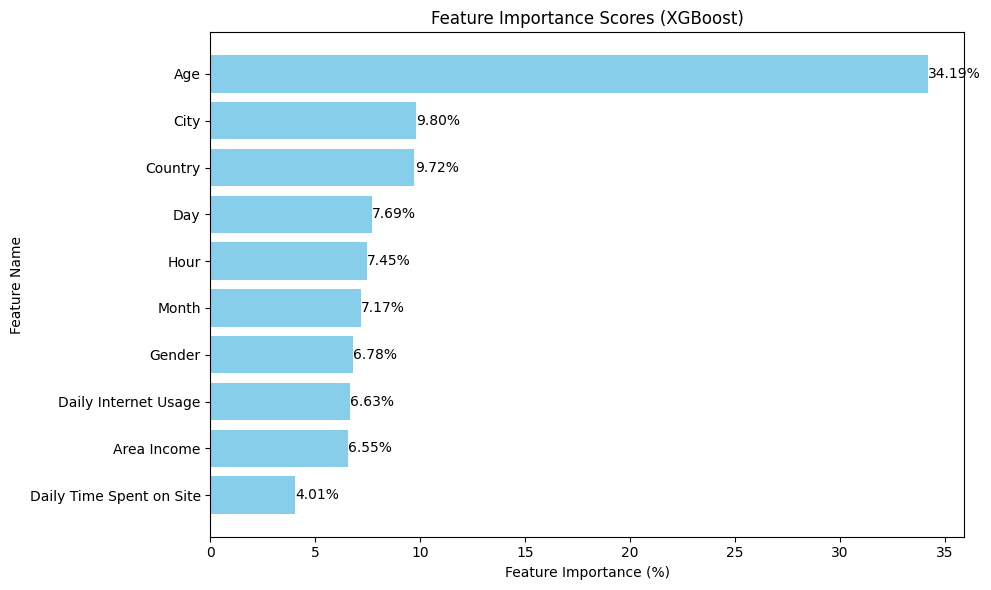

In [20]:
# Get and sort feature importances
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns
total_importance = sum(feature_importances)  # Calculate total importance

# Calculate percentage importances
percentage_importances = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Create feature importance visualization with percentages
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Add percentage labels on top of bars
for i, v in enumerate(feature_importance_df['importance']):
    plt.text(v + 0.02, i, f"{v:.2f}%", va='center')  # Adjust offset for better positioning

plt.tight_layout()
plt.show()

## Data Preparation for Logistic Regression Model

In [23]:
# Select relevant features and the target variable for Logic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = data['Clicked on Ad']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Model Training

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {
        'solver': ['lbfgs'],
        'penalty': ['l2', 'none'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0, 0.5, 1]  # only used for elasticnet
    }
]

model = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty i

Best parameters: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Administrator\miniconda3\envs\ctr\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
100 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Administrator\minicond

## Making Predictions

In [27]:
# Predict on the test set
y_pred = best_model.predict(X_test)

## Performance Evaluation

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72
Precision: 0.73
Recall: 0.68
F1-Score: 0.70

Confusion Matrix:
[[1169  374]
 [ 462  995]]


## Feature Importance

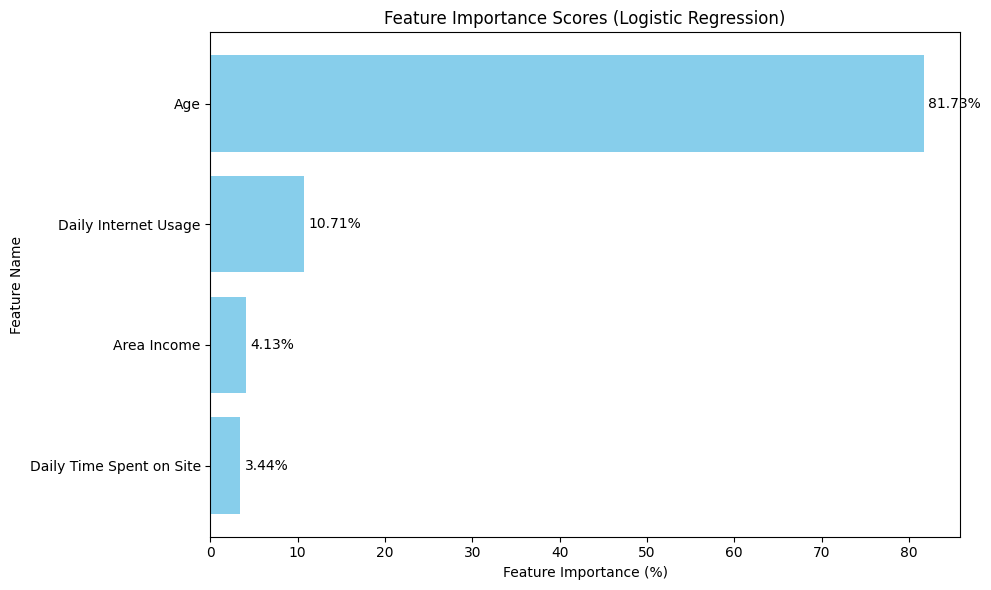

In [29]:
# Get feature importance using the coefficients of the logistic regression model
feature_importances = np.abs(best_model.coef_[0])
feature_names = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Normalize the importance values to percentages
total_importance = sum(feature_importances)
percentage_importances = (feature_importances / total_importance) * 100

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores (Logistic Regression)')
plt.gca().invert_yaxis()

# Add percentage labels on top of bars
for i, v in enumerate(feature_importance_df['importance']):
    plt.text(v + 0.5, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.show()